#### **Import Libs**

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

#### **Getting training && validation data**

In [2]:
df_train = pd.read_csv('../databases/training.csv')
df_test = pd.read_csv('../databases/test.csv')

In [3]:
X_train, y_train = df_train.drop(['IND_BOM_1_1'], axis=1), df_train['IND_BOM_1_1']
X_test, y_test = df_test.drop(['IND_BOM_1_1'], axis=1), df_test['IND_BOM_1_1']

In [4]:
X_train = np.array(X_train)
X_test = np.array(X_test)

#### **Training model**

Best parameters found on optuna study:
```python

params = {
    'n_estimators': 185,
    'max_depth': 42,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'criterion': 'gini',
    'max_features': 'sqrt'
}

Still caused some interpolation problems, making the classifier instable. So after studying the importance of each hyperparameter in the Optuna, I could make some changes manually to get a better and stable result.
```

In [5]:
model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='gini',
    verbose=1,
    n_jobs=-1
)

model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.5s finished


RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1, verbose=1)

In [6]:
import joblib

joblib.dump(model, './raw_models/random_forest.pkl')

['./raw_models/random_forest.pkl']

#### **Model evaluation**

In [7]:
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import scikitplot as skplt

In [8]:
y_pred = model.predict(X_test)
y_probas = model.predict_proba(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.2s finished


In [9]:
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_probas)

print(f'Loss: {loss}\nAccuracy: {accuracy}')

Loss: 0.6324547194846659
Accuracy: 0.6306847821855414


##### KS and AUC analysis

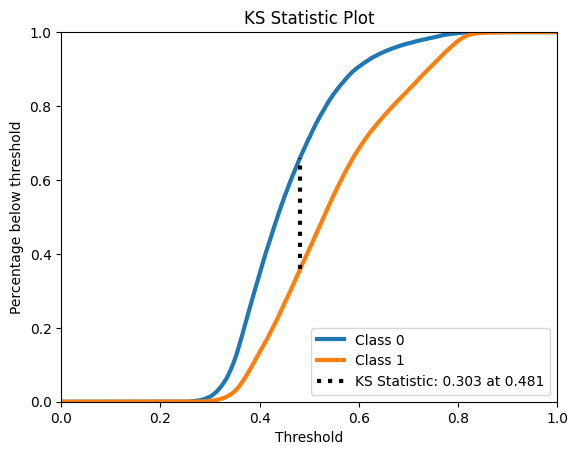

In [10]:
skplt.metrics.plot_ks_statistic(y_true=y_test, y_probas=y_probas)
plt.show()